# Урок 2. Метрики качества классификации ч.1

В уроке мы разбирали матрицу ошибок и некоторые метрики, основанные на терминах матрицы ошибок. Здесь же посмотрим, как эти метрики применять на практике и что  по ним можно выяснить.

### 1.1
Выкачайте тренировочный датасет Titanic - train.csv - с сайта [kaggle](https://www.kaggle.com/c/titanic/data). С помощью функции pd.read_csv() загрузите данные в датафрейм. Выведите первые 20 строк и проанализируйте данные: какие колонки присутствуют (более конкретная информация по ним есть на сайте kaggle), каким образом в них обозначены данные и какие типы данных используются (используйте pandas.dtypes).

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("titanic/train.csv")
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 1.2
Проверьте, имеются ли пропущенные значения в колонках, и выведите сумму всех пропущенных значений в каждой из колонок.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
missed_values = df.isnull()
for col in missed_values.columns.values.tolist():
    print(col)
    print(missed_values[col].value_counts(), "\n")

PassengerId
PassengerId
False    891
Name: count, dtype: int64 

Survived
Survived
False    891
Name: count, dtype: int64 

Pclass
Pclass
False    891
Name: count, dtype: int64 

Name
Name
False    891
Name: count, dtype: int64 

Sex
Sex
False    891
Name: count, dtype: int64 

Age
Age
False    714
True     177
Name: count, dtype: int64 

SibSp
SibSp
False    891
Name: count, dtype: int64 

Parch
Parch
False    891
Name: count, dtype: int64 

Ticket
Ticket
False    891
Name: count, dtype: int64 

Fare
Fare
False    891
Name: count, dtype: int64 

Cabin
Cabin
True     687
False    204
Name: count, dtype: int64 

Embarked
Embarked
False    889
True       2
Name: count, dtype: int64 



### 1.3
Замените все пропущенные значения колонки Age на медианы в зависимости от пола человека: т.е. если пол человека в строке с пропущенным значением "male", заменяете пропущенное значение возраста на медиану по всем известным возрастам мужчин, и наоборот. Выведите медианы возраста в зависимости от пола. Пропущенные значения колонок Cabin и Embarked замените на U (Unknown).

Примечание: для группировки по полу можно использовать метод df.groupby(), который имеет встроенные агрегатные функции (в т.ч. для вычисления медианы).  Для установки пропущенных значений в датасете воспользуйтесь функцией df.apply().

In [6]:
age_means = df[["Sex", "Age"]].groupby("Sex").mean()
age_means

,Age
Sex,
female,27.915709
male,30.726645


In [7]:
df.loc[(df["Sex"] == "male") & (df["Age"].isnull()), ["Age"]] = df["Age"].apply(lambda x: age_means["Age"]["male"])
df.loc[(df["Sex"] == "female") & (df["Age"].isnull()), ["Age"]] = df["Age"].apply(lambda x: age_means["Age"]["female"])
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,30.726645,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [8]:
df["Cabin"] = df["Cabin"].fillna("U")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U,S
5,6,0,3,"Moran, Mr. James",male,30.726645,0,0,330877,8.4583,U,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,U,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,U,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,U,C


In [9]:
df["Embarked"] = df["Embarked"].fillna("U")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U,S
5,6,0,3,"Moran, Mr. James",male,30.726645,0,0,330877,8.4583,U,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,U,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,U,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,U,C


In [10]:
missed_values = df.isnull()
for col in missed_values.columns.values.tolist():
    print(col)
    print(missed_values[col].value_counts(), "\n")

PassengerId
PassengerId
False    891
Name: count, dtype: int64 

Survived
Survived
False    891
Name: count, dtype: int64 

Pclass
Pclass
False    891
Name: count, dtype: int64 

Name
Name
False    891
Name: count, dtype: int64 

Sex
Sex
False    891
Name: count, dtype: int64 

Age
Age
False    891
Name: count, dtype: int64 

SibSp
SibSp
False    891
Name: count, dtype: int64 

Parch
Parch
False    891
Name: count, dtype: int64 

Ticket
Ticket
False    891
Name: count, dtype: int64 

Fare
Fare
False    891
Name: count, dtype: int64 

Cabin
Cabin
False    891
Name: count, dtype: int64 

Embarked
Embarked
False    891
Name: count, dtype: int64 



### 1.4
Выведите возраст пассажиров с PassengerID = [6, 20]. Убедитесь, что заполнены все пропущенные значения (воспользуйтесь функцией df.isnull() ).

In [11]:
df.loc[(df["PassengerId"] == 6) | (df["PassengerId"] == 20), ["PassengerId", "Age"]]

,PassengerId,Age
5,6,30.726645
19,20,27.915709


Так как не все классификаторы могут работать с категориальными признаками, в данном случае необходимо заменить их на числовые.

Также можно было бы выделить расширенные признаки, такие как статус пассажира (Mr., Mrs., Miss., Dr., Master. и т.д.), собственный индекс билета, индекс палубы и другие, но здесь ограничимся выбором более простых признаков.

### 1.5
В колонке Sex замените значения на 0, если пол "male", и на 1, если "female". В колонке Embarked замените параметры "U", "S", "C", "Q" на 0, 1, 2, 3 соответственно. Отбросьте колонки PassengerId, Name, Ticket, Cabin. Выведите первые 20 строк получившегося набора данных.

In [12]:
df["Sex"] = df["Sex"].map({'male': 0, 'female': 1})
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,U,S
5,6,0,3,"Moran, Mr. James",0,30.726645,0,0,330877,8.4583,U,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,U,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,U,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,U,C


In [13]:
df["Embarked"] = df["Embarked"].map({key: value for key, value in list(zip(["U", "S", "C", "Q"], range(4)))})
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,U,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,U,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,U,1
5,6,0,3,"Moran, Mr. James",0,30.726645,0,0,330877,8.4583,U,3
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,E46,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,U,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,U,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,U,2


In [14]:
df = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,1
1,1,1,1,38.000000,1,0,71.2833,2
2,1,3,1,26.000000,0,0,7.9250,1
3,1,1,1,35.000000,1,0,53.1000,1
4,0,3,0,35.000000,0,0,8.0500,1
5,0,3,0,30.726645,0,0,8.4583,3
6,0,1,0,54.000000,0,0,51.8625,1
7,0,3,0,2.000000,3,1,21.0750,1
8,1,3,1,27.000000,0,2,11.1333,1
9,1,2,1,14.000000,1,0,30.0708,2


In [15]:
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,1
1,1,1,1,38.000000,1,0,71.2833,2
2,1,3,1,26.000000,0,0,7.9250,1
3,1,1,1,35.000000,1,0,53.1000,1
4,0,3,0,35.000000,0,0,8.0500,1
5,0,3,0,30.726645,0,0,8.4583,3
6,0,1,0,54.000000,0,0,51.8625,1
7,0,3,0,2.000000,3,1,21.0750,1
8,1,3,1,27.000000,0,2,11.1333,1
9,1,2,1,14.000000,1,0,30.0708,2


In [40]:
df.to_csv("titanic/cleaned.csv", index=0)

### 1.6
Приступим к построению классификаторов. **Условимся, что, если функция или объект модели имеют параметр random_state, то устанавливаем его равным 17 в каждом из случаев.**

Разделите данные на тренировочный и тестовый датасеты, установив размер тестового как 0.25 (первая колонка Survived является целевой, поэтому необходимо сначала ее отделить от признаков).

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["Survived"], axis=1).values, df["Survived"].values, test_size=0.25, random_state=17)
print(X_train.shape,  X_test.shape, y_train.shape, y_test.shape)

(668, 7) (223, 7) (668,) (223,)


### 1.7
Обучите на полученных выборках несколько классификаторов, которые импортированы ниже.

**Примечание: в методе ближайших соседей используйте количество соседей, равное 5.**

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [19]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
gaus_nb = GaussianNB().fit(X_train, y_train)
decision_tree = DecisionTreeClassifier(random_state=17).fit(X_train, y_train)
regression = LogisticRegression(random_state=17).fit(X_train, y_train)


Очевидно, в этом случае использовать метрику accuracy, которую мы применяли до этого, не совсем правильно: она не даст верную оценку классификатору, потому как выживших явно меньше, чем погибших.

Вспомним про такие метрики как точность и полнота. Здесь они подойдут хорошо, так как у нас имеются положительный и отрицательный классы, и определить корректно один из них может оказаться более важным .

### 1.8
В каждом из пунктов следующего теста выберите, что важнее максимизировать: точность (precision) или полноту (recall). Выпишите ответы.

1. Вероятность того, что при определенной поломке самолета он сможет долететь до пункта назначения (1 - долетел, 0 - не долетел).
2. Предсказание, представляет ли человек опасность, по анализу психического состояния (1 - представляет опасность, 0 - не представляет опасности).
3. Предсказание ухода клиента (1 - клиент ушел, 0 - остался).
4. Выявление рака на основе медицинских показателей (1 - болен раком, 0 - здоров).
5. Предсказание летальности при наблюдаемой мутации (1 - выживание, 0 - летальный исход).
6. Определение важности происшествия для экстренных служб (1 - важно, 0 - неважно).
7. Окупятся ли вложения в бизнес (1 - окупятся, 0 - не окупятся).

Ваш ответ:

1. recall<br>
2. precision<br>
3. precision<br>
4. precision<br>
5. recall<br>
6. precision<br>
7. recall<br>

### 1.9

Определите, что важнее использовать в случае датасета Titanic: полноту или точность. Объясните, почему.

---
Better to use - recall, because False-Negative is more valuable here then False-Positive


### 1.10
Для каждого классификатора выведите матрицу ошибок и самостоятельно рассчитайте метрику recall (расчеты должны присутствовать). Проверьте расчеты, воспользовавшись встроенной метрикой recall_score.

In [20]:
from sklearn.metrics import confusion_matrix, recall_score

In [21]:
classifiers_names = ["KNeighborsClassifier", "GaussianNB", "DecisionTreeClassifier", "LogisticRegression"]
classifiers = [knn, gaus_nb, decision_tree, regression]
print("Analytic calculation:\n")
for name, classifier in zip(classifiers_names, classifiers):
    y_pred = classifier.predict(X_test)
    predictions = pd.DataFrame({"y_pred": y_pred, "y_test": y_test}).sort_values(by=["y_pred", "y_test"])
    predictions = predictions.groupby(["y_pred", "y_test"]).size().reset_index(name="count")
    predictions.index = ["TN", "FN", "FP", "TP"]
    recall = predictions["count"]["TP"] / (predictions["count"]["TP"] + predictions["count"]["FN"])
    print(f"Model {name}\nrecall: {recall:.3f}\n")



Analytic calculation:

Model KNeighborsClassifier
recall: 0.500

Model GaussianNB
recall: 0.707

Model DecisionTreeClassifier
recall: 0.717

Model LogisticRegression
recall: 0.696



In [22]:
classifiers_names = ["KNeighborsClassifier", "GaussianNB", "DecisionTreeClassifier", "LogisticRegression"]
classifiers = [knn, gaus_nb, decision_tree, regression]
print("Matrix calculation:\n")
for name, classifier in zip(classifiers_names, classifiers):
    y_pred = classifier.predict(X_test)
    matrix = confusion_matrix(y_test, y_pred)
    recall = matrix[1][1] / (matrix[1][1] + matrix[1][0])
    print(f"Model {name}\nrecall: {recall:.3f}\n")

Matrix calculation:

Model KNeighborsClassifier
recall: 0.500

Model GaussianNB
recall: 0.707

Model DecisionTreeClassifier
recall: 0.717

Model LogisticRegression
recall: 0.696



In [23]:
classifiers_names = ["KNeighborsClassifier", "GaussianNB", "DecisionTreeClassifier", "LogisticRegression"]
classifiers = [knn, gaus_nb, decision_tree, regression]
print("Sklearn calculation:\n")
for name, classifier in zip(classifiers_names, classifiers):
    y_pred = classifier.predict(X_test)
    recall = recall_score(y_test, y_pred)
    print(f"Model {name}\nrecall: {recall:.3f}\n")

Sklearn calculation:

Model KNeighborsClassifier
recall: 0.500

Model GaussianNB
recall: 0.707

Model DecisionTreeClassifier
recall: 0.717

Model LogisticRegression
recall: 0.696



### 1.11
Выберите ту модель, на которой метрика recall давала лучший ответ, и рассчитайте для нее precision, используя встроенную функцию.

In [24]:
from sklearn.metrics import precision_score

In [25]:
y_pred = decision_tree.predict(X_test)
print(f"Model: DecisionTreeClassifier, precision: {precision_score(y_test, y_pred):.3f}")

Model: DecisionTreeClassifier, precision: 0.759


# Урок 4. Метрики качества классификации ч.2

Продолжим работу с метриками классификации. В предыдущем задании мы разобрали матрицу ошибок и две основные метрики, которые используются при бинарной классификации.

Сейчас рассмотрим F-меру - совокупную метрику по precision и recall - и более сложную AUC-ROC.

### 2.1
Из задания к предыдущему уроку выберите классификатор, который давал наименьшее значение recall, вычислите для него precision, применив precision_score, и самостоятельно посчитайте F1-меру (расчеты должны присутствовать). Затем проверьте ответ, используя встроенную функцию.

Сравните полученную f1-меру со значением среднего арифметического полноты и точности.

In [26]:
from sklearn.metrics import precision_score, f1_score

In [27]:
y_pred = knn.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Model: KNeighborsClassifier, precision: {precision:.3f}")
beta = 1
f1_analytic = (1 + beta**2)*((precision*recall)/(beta**2*precision+recall))
f1_sklearn = f1_score(y_test, y_pred)
print(f"F1 analytic:\t{f1_analytic:.3f}\nF1 sklearn:\t{f1_sklearn:.3f}")

Model: KNeighborsClassifier, precision: 0.719
F1 analytic:	0.590
F1 sklearn:	0.590


In [28]:
arithmetic_mean = (recall + precision) / 2
print(f"F1:\t\t\t{f1_analytic:.3f}\nArithmetic mean:\t{arithmetic_mean:.3f}")

F1:			0.590
Arithmetic mean:	0.609


В библиотеке sklearn есть удобная функция classification_report, возвращающая precision, recall, F-меру и количество экземпляров каждого класса в удобном для чтения формате. Также существует функция precision_recall_fscore_support, возвращающая те же самые метрики, но в форме массива.

### 2.2
Для каждого классификатора из предыдущего урока рассчитайте и выведите следующие импортированные метрики.

In [29]:
from sklearn.metrics import precision_recall_fscore_support, classification_report

In [30]:
classifiers_names = ["KNeighborsClassifier", "GaussianNB", "DecisionTreeClassifier", "LogisticRegression"]
classifiers = [knn, gaus_nb, decision_tree, regression]
print("Metrics:\n")
for name, classifier in zip(classifiers_names, classifiers):
    y_pred = classifier.predict(X_test)
    metrics = precision_recall_fscore_support(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(
        f"Model {name}\n\n"\
        f"Metrics matrix:\n{metrics}\n"\
        f"Report:\n{report}\n"
        "---------------------------------------"
    )


Metrics:

Model KNeighborsClassifier

Metrics matrix:
(array([0.71069182, 0.71875   ]), array([0.86259542, 0.5       ]), array([0.77931034, 0.58974359]), array([131,  92]))
Report:
              precision    recall  f1-score   support

           0       0.71      0.86      0.78       131
           1       0.72      0.50      0.59        92

    accuracy                           0.71       223
   macro avg       0.71      0.68      0.68       223
weighted avg       0.71      0.71      0.70       223

---------------------------------------
Model GaussianNB

Metrics matrix:
(array([0.80434783, 0.76470588]), array([0.84732824, 0.70652174]), array([0.82527881, 0.73446328]), array([131,  92]))
Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       131
           1       0.76      0.71      0.73        92

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       

Вернемся к классификатору LogisticRegression, который мы обучали в предыдущем задании. Там мы не затрагивали настройку гиперпараметров: сделать это можно с помощью LogisticRegressionCV - перебора параметров по сетке с последующей кросс-валидацией (по сути это аналог GridSearchCV, но со своими параметрами внутри, применимыми только к логистической регрессии). Этот класс создан специально для логистической регрессии, т.к. для нее известны эффективные алгоритмы перебора параметров.

У LogisticRegression есть гиперпараметр C - обратный коэффициент регуляризации. Не вдаваясь в подробное описание по формуле, можно сказать, что C соответствует "сложности" модели: чем больше C, тем более сложные зависимости может восстанавливать модель; если параметр C слишком мал (слишком сильная регуляризация), то модель окажется недообученной, а если наоборот регуляризация слишком слабая (т.е. C принимает большие значения), то скорее всего модель окажется переобученной, потому как модель будет слишком "бояться" ошибиться на обучающей выборке.

### 2.3

1. Используя StratifiedKFold, разбейте данные для кросс-валидации по 5-ти блокам (не забывайте во всех методах использовать random_state=17).
2. С помощью numpy.logspace разбейте интервал (-1, 2) на 500 значений.
3. С помощью LogisticRegressionCV подберите оптимальный параметр C: установите гиперпараметр Cs равным объекту из п.2 (разбиение интервала (-1, 2) отвечает за подбор обратного коэффициента регуляризации C); cv равным объекту из п.1 (разбиение для кросс-валидации); scoring равным "roc_auc" (отвечает за оптимизацию гиперпараметров на кросс-валидации: метрика, установленная в scoring, контролирует, как оценивать модель при каждом из наборе параметров, т.е. показывает, какая метрика должна быть наилучшей).
4. Обучите полученную модель на тренировочных данных.

In [31]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

In [32]:
skf = StratifiedKFold(n_splits=5, random_state=17, shuffle=True)
interval = np.logspace(-1, 2, 500)
log_reg_cv = LogisticRegressionCV(Cs=interval, cv=skf, scoring="roc_auc", random_state=17).fit(X_train,y_train)

/home/hik0/mount/500_gb/data_science/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hik0/mount/500_gb/data_science/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

### 2.4
Используя метод plot из matplotlib.pyplot, выведите график зависимости auc_roc от значения C.

*Примечание: значения по оси x - разбиение с помощью np.logspace из п.2 предыдущего задания, а значения по оси y - среднее значение roc_auc по каждой валидации, т.е. среднее значение из полученных на каждом из 5-ти разбиений при данном параметре C (используйте метод scores_ объекта, который инкапсулирует LogisticRegressionCV).*

In [33]:
import matplotlib.pyplot as plt

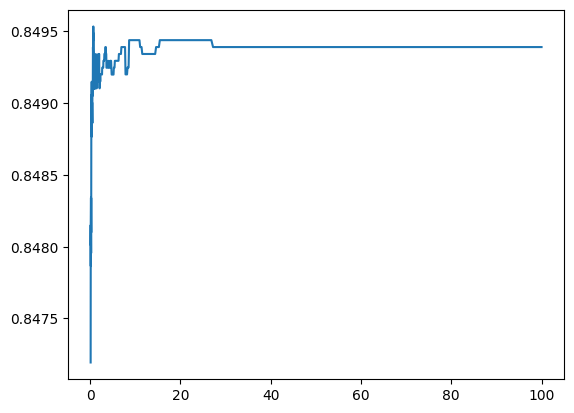

In [34]:
plt.plot(interval, log_reg_cv.scores_[1].mean(axis=0))
plt.show()


### 2.5
С помощью метода C_ того же объекта выведите лучшее значение C. Выведите более конкретную область графика (область ~15 точкам по x), включающую лучшее значение C.

*Примечание: используйте plt.xlim.*

C_: 0.695


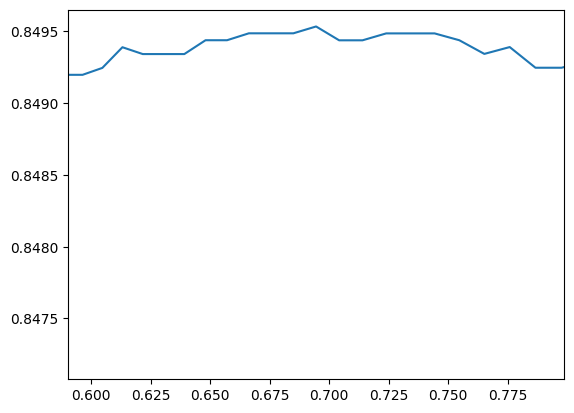

In [35]:
C = log_reg_cv.C_[0]
print(f"C_: {C:.3f}")
plt.xlim(C-C*0.15, C+C*0.15) # +- 15% near C_
plt.plot(interval, log_reg_cv.scores_[1].mean(axis=0))
plt.show()


### 2.6
С помощью метода predict_proba получите вероятности принадлежности объектов тестовой выборки к классам. Постройте график roc_auc для тестовой выборки и выведите значение auc.

**Пример** построения графика.

In [36]:
from sklearn.metrics import roc_auc_score, roc_curve

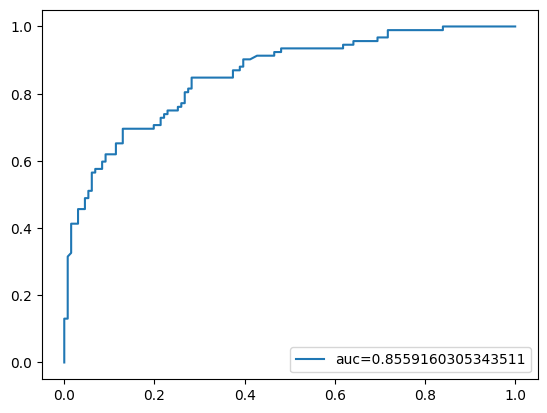

In [37]:
probas = log_reg_cv.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, probas[:, 1])
auc = roc_auc_score(y_test, probas[:, 1])
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)